# **Linear SVM Demonstration**

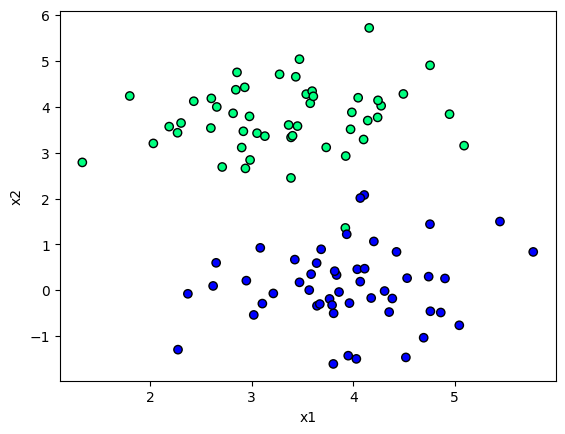

In [ ]:
#Generate Synthetic Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=10, cluster_std=0.8, center_box=(0, 5))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

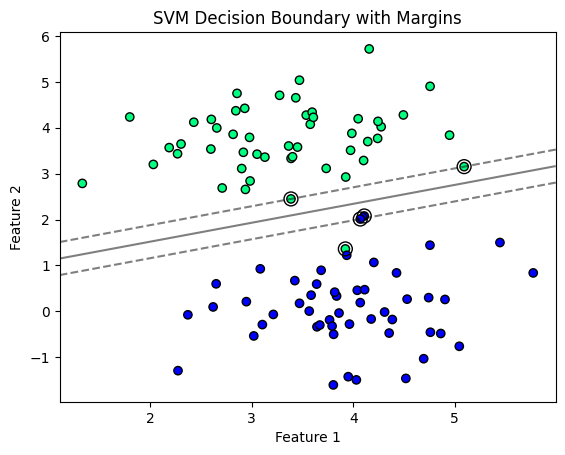

In [ ]:
#Trains SVM Classifier
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100)  # Hard margin
svm.fit(X, y)

# Get model parameters
w = svm.coef_[0]
b = svm.intercept_[0]

# %% [markdown]
# ## 3. Visualize Decision Boundary and Margins

# %%
def plot_svm_boundary():
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
    ax = plt.gca()

    # Plot decision boundary (w·x + b = 0)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # Plot boundary and margins (w·x + b = ±1)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title("SVM Decision Boundary with Margins")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_svm_boundary()

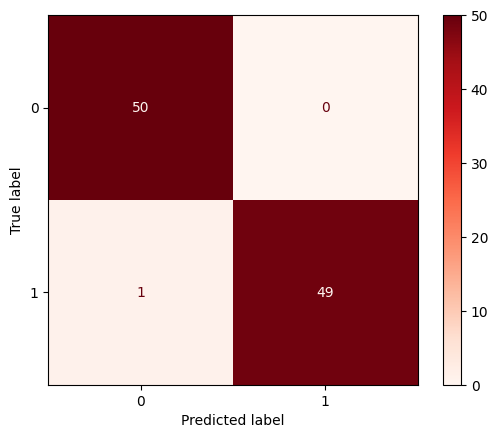

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict labels
y_pred = svm.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds', values_format='d')
plt.show()

# **Nonlinear SVM with Kernel**

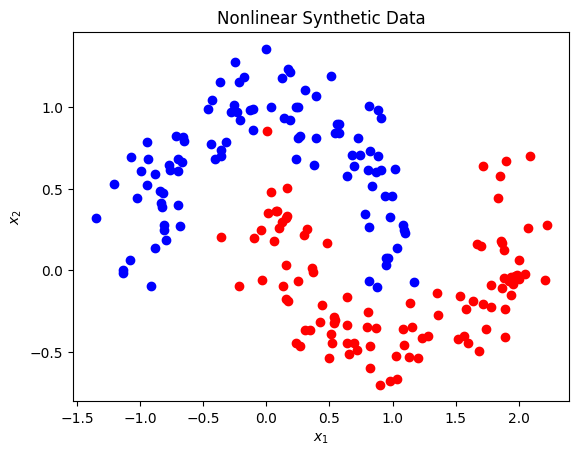

In [ ]:
# Generation of Synthetic Nonlinear Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
plt.title("Nonlinear Synthetic Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
#Training SVM
from sklearn.svm import SVC

# Create models
linear_svm = SVC(kernel='linear', C=1)
rbf_svm = SVC(kernel='rbf', gamma=1, C=1)

# Fit both models
linear_svm.fit(X, y)
rbf_svm.fit(X, y)

def plot_decision_boundary(clf, title, kernel_type=None):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', edgecolor='k')

    # Create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Get predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    if kernel_type == 'rbf':
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=100, facecolors='none', edgecolors='k', linewidths=1)

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

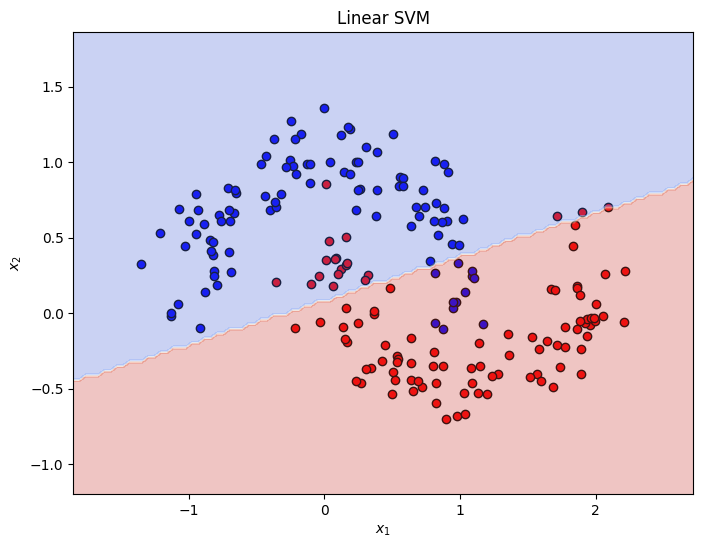

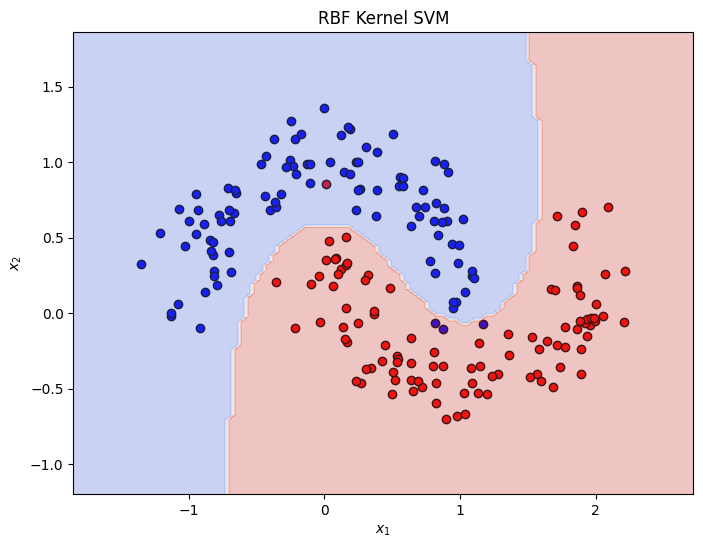

In [ ]:
# Plot both models
plot_decision_boundary(linear_svm, "Linear SVM")
plot_decision_boundary(rbf_svm, "RBF Kernel SVM")

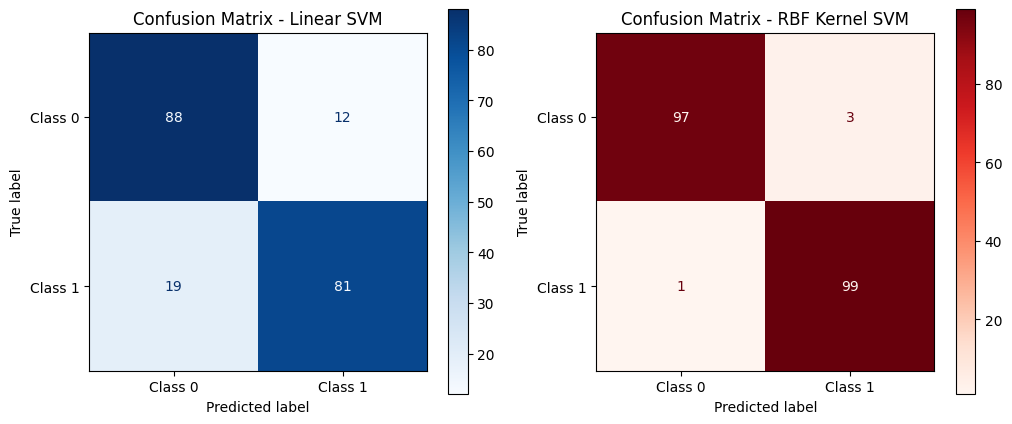

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the trained models
y_pred_linear = linear_svm.predict(X)
y_pred_rbf = rbf_svm.predict(X)

# Compute confusion matrices
cm_linear = confusion_matrix(y, y_pred_linear)
cm_rbf = confusion_matrix(y, y_pred_rbf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear SVM Confusion Matrix
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=["Class 0", "Class 1"])
disp_linear.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Linear SVM")

# RBF Kernel SVM Confusion Matrix
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=["Class 0", "Class 1"])
disp_rbf.plot(ax=axes[1], cmap='Reds')
axes[1].set_title("Confusion Matrix - RBF Kernel SVM")

plt.show()

# **Multiple Kernel Learning**

Optimized kernel weights: [3.25987446e-09 9.99999993e-01 3.26122008e-09]
RBF Kernel Test Accuracy: 0.80
Polynomial Kernel Test Accuracy: 0.80
Linear Kernel Test Accuracy: 0.78
MKL Kernel Test Accuracy: 0.80


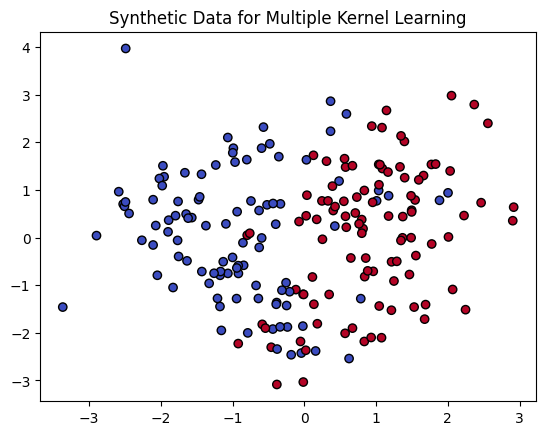

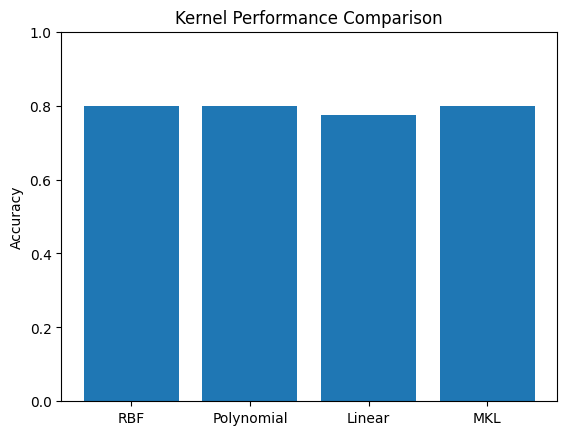

In [ ]:
#MUltiple Kernel Learning Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import cvxpy as cp

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)
y = 2 * y - 1  # Convert to -1 and 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute kernels
K_rbf = rbf_kernel(X_train, X_train, gamma=0.5)
K_poly = polynomial_kernel(X_train, X_train, degree=3, coef0=1)
K_linear = linear_kernel(X_train, X_train)

# Stack kernels into a 3D array
K_all = np.array([K_rbf, K_poly, K_linear])
num_kernels = K_all.shape[0]
num_samples = K_all.shape[1]

# Define MKL optimization problem
beta = cp.Variable(num_kernels, nonneg=True)
K_combined = sum(beta[i] * K_all[i] for i in range(num_kernels))
objective = cp.Maximize(cp.trace(K_combined))  # Simple trace-based objective
constraints = [cp.sum(beta) == 1]  # Sum of weights must be 1
prob = cp.Problem(objective, constraints)
prob.solve()

# Get optimized kernel weights
beta_values = beta.value
print("Optimized kernel weights:", beta_values)

# Compute final kernel using optimized weights
K_final_train = sum(beta_values[i] * K_all[i] for i in range(num_kernels))
K_final_test = sum(beta_values[i] * kernel_fn(X_test, X_train) for i, kernel_fn in
                    enumerate([lambda X1, X2: rbf_kernel(X1, X2, gamma=0.5),
                              lambda X1, X2: polynomial_kernel(X1, X2, degree=3, coef0=1),
                              lambda X1, X2: linear_kernel(X1, X2)]))

# Train and evaluate models for individual kernels
kernels = {'RBF': K_rbf, 'Polynomial': K_poly, 'Linear': K_linear, 'MKL': K_final_train}
kernel_test_functions = {'RBF': lambda X1, X2: rbf_kernel(X1, X2, gamma=0.5),
                         'Polynomial': lambda X1, X2: polynomial_kernel(X1, X2, degree=3, coef0=1),
                         'Linear': lambda X1, X2: linear_kernel(X1, X2),
                         'MKL': lambda X1, X2: K_final_test}

accuracy_results = {}
for kernel_name, K_train in kernels.items():
    K_test = kernel_test_functions[kernel_name](X_test, X_train)
    svm = SVC(kernel='precomputed')
    svm.fit(K_train, y_train)
    accuracy = svm.score(K_test, y_test)
    accuracy_results[kernel_name] = accuracy
    print(f"{kernel_name} Kernel Test Accuracy: {accuracy:.2f}")

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Data for Multiple Kernel Learning")
plt.show()

# Plot accuracy comparison
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.ylabel("Accuracy")
plt.title("Kernel Performance Comparison")
plt.ylim(0, 1)
plt.show()


# **Hyperparameter Tuning**

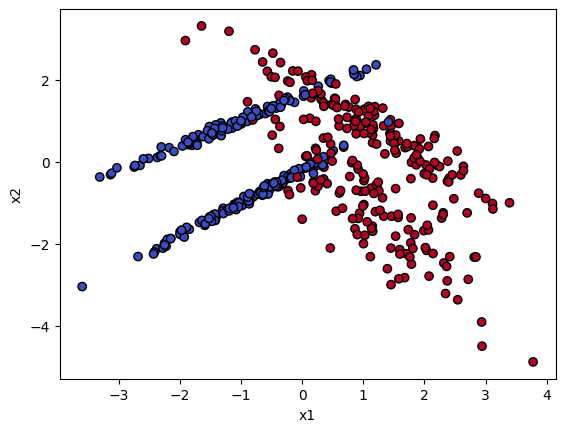

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Model Accuracy on Test Set: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



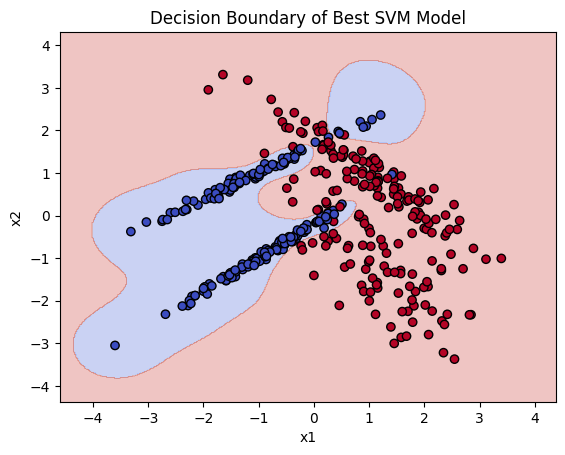

In [ ]:
#Hyperparameter Tuning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the SVM model
svm = SVC()

# Step 3: Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Different kernels
}

# Step 4: Perform Grid Search Cross Validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)
print("Best Model Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visualizing results
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary of Best SVM Model")
    plt.show()

# Plot decision boundary based on hypertuned parameters
plot_decision_boundary(best_model, X_train, y_train)

In [ ]:
# Perform Cross Validation on Best Model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy Scores: [0.9375 0.9875 0.9125 0.9875 0.9625]
Mean Cross-validation Accuracy: 0.9575000000000001
